首先导入必要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

读取数据

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


查看缺失数据的热力图

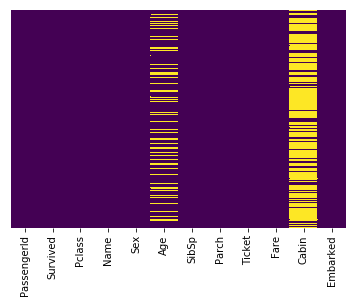

In [3]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

数据中一些特征的统计表格

In [4]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


查看存活的人和为存活的人之间的比例

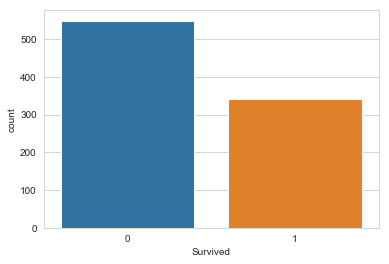

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

查看存活的人与性别的关系

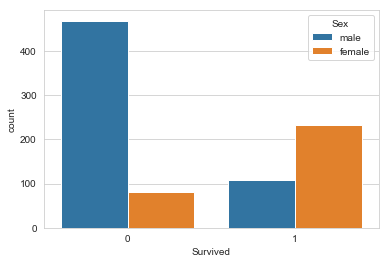

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

In [7]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


查看存活的人与船舱级别的关系

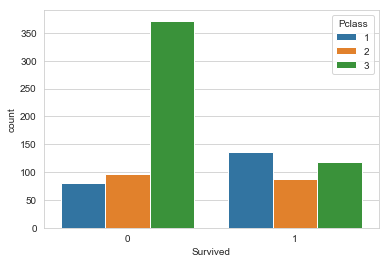

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


查看年龄的分布

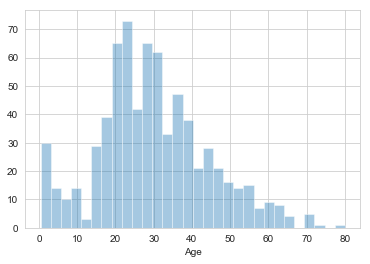

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

查看乘船人的家族关系以及和存活之间的关系

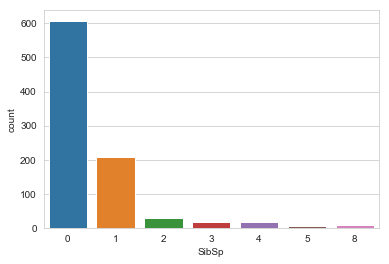

In [11]:
sns.countplot(x='SibSp', data=train)

In [12]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


乘客的票价分布

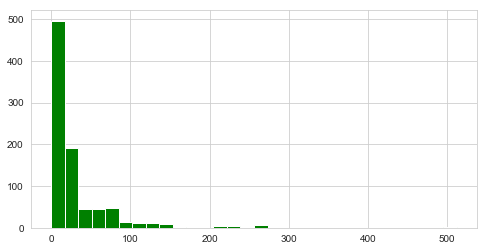

In [13]:
train['Fare'].hist(color='green', bins=30, figsize=(8,4))

查看年龄和船舱等级的关系

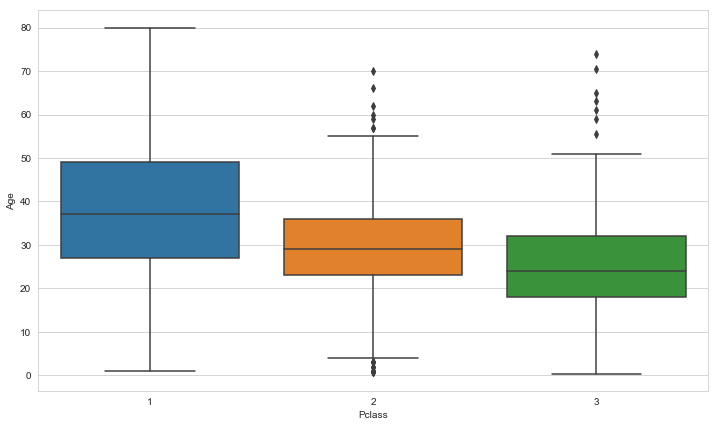

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

定义一个船舱等级和年龄的推算函数

In [15]:
def infer_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
train['Age'] = train[['Age', 'Pclass']].apply(infer_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(infer_age, axis=1)

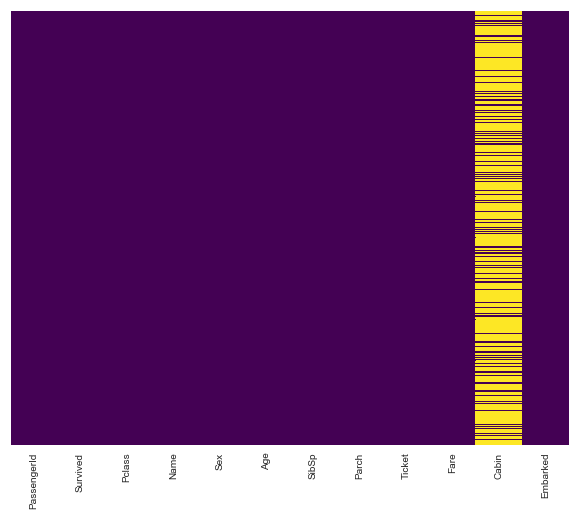

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


对乘客的名字进行归类

In [20]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [21]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataname in [train, test]:
    dataname['Title'] = dataname['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', \
                                            'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataname['Title'] = dataname['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataname['Title'] = dataname['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)
test['Title'] = test['Title'].fillna(0)

In [24]:
train.dropna(inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


将性别和上船地点等特征变成 categorial feature

In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop(['Sex','Embarked','Name', 'PassengerId'], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)

In [28]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S
0,0,3,22.0,1,0,7.2500,1,1,0,1
1,1,1,38.0,1,0,71.2833,3,0,0,0
2,1,3,26.0,0,0,7.9250,2,0,0,1
3,1,1,35.0,1,0,53.1000,3,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [29]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)
test.drop(['Sex', 'Embarked', 'Name'], axis=1, inplace=True)
test = pd.concat([test, sex_test, embark_test], axis=1)
test_feat = test.drop(['PassengerId'], axis=1)

In [30]:
test_feat['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [31]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,3,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,3,0,0,1


选择模型进行训练

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.2, random_state=2019)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/xyliao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

模型结果和相关性分析

In [36]:
acc_log = round(logmodel.score(X_test, y_test)*100, 2)
print(acc_log)

80.9


In [37]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logmodel.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,male,0.580389
7,S,0.145003
4,Title,0.006847
1,SibSp,-0.029502
3,Fare,-0.071775
2,Parch,-0.521395
0,Age,-0.753287
6,Q,-1.940535


In [38]:
predictions = logmodel.predict(X_test)

得到混淆矩阵

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test, predictions))

[[98 17]
 [17 46]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       115
           1       0.73      0.73      0.73        63

   micro avg       0.81      0.81      0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



通过测试集提交结果

In [42]:
test_pred = logmodel.predict(test_feat)
test_pred = pd.DataFrame(test_pred, columns=['Survived'])

In [43]:
test_result = pd.concat([test, test_pred], axis=1, join='inner')

In [44]:
test_result.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,1,0,0
1,893,3,47.0,1,0,7.0000,3,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,1,0,1,0
4,896,3,22.0,1,1,12.2875,3,0,0,1,1


In [45]:
df = test_result[['PassengerId', 'Survived']]
df.to_csv('submission.csv', index=False)